In [493]:
import pandas as pd

In [494]:
df = pd.read_csv('analysed-final_data.csv')

In [495]:
df

,Unnamed: 0,cpu_idle,cpu_iowait,cpu_nice,cpu_softirq,cpu_system,cpu_total,cpu_user,diskio_sda1_read_bytes,diskio_sda1_time_since_update,...,network_lo_cumulative_rx_flag,network_lo_cumulative_tx_flag,network_lo_cx_flag,network_lo_rx_flag,network_lo_time_since_update_flag,network_lo_tx_flag,fs_/_percent_flag,processcount_running_flag,totalflags,an_flag
0,0,0.0,0.0,0.0,0.0,2.0,100.0,6.0,0.0,1.000000,...,0,0,1,1,1,1,1,0,9,1
1,1,0.0,0.0,0.0,0.0,2.0,100.0,39.0,0.0,1.022863,...,0,0,0,0,1,0,1,0,5,1
2,2,0.0,0.0,0.0,0.0,2.0,100.0,42.0,0.0,1.059135,...,0,0,0,0,1,0,1,0,6,1
3,3,0.0,0.0,0.0,0.0,2.0,100.0,40.0,0.0,0.992989,...,0,0,0,0,1,0,1,1,7,1
4,4,0.0,0.0,0.0,0.0,1.0,100.0,37.0,0.0,1.007005,...,0,0,0,0,1,0,1,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95305,80846,91.7,0.0,0.0,0.0,2.8,9.9,5.5,0.0,1.101565,...,0,0,0,0,1,0,0,0,1,0
95306,80847,88.4,0.0,0.0,0.9,4.5,10.0,6.3,0.0,1.103106,...,0,0,0,0,1,0,0,0,2,0
95307,80848,91.7,0.0,0.0,0.0,2.8,9.1,5.5,0.0,1.097409,...,0,0,0,0,1,0,0,0,2,0
95308,80849,92.6,0.0,0.0,0.0,2.8,8.3,4.6,0.0,1.086013,...,0,0,0,0,1,0,0,0,1,0


## In last notebook these variables were found to be good indicators of cryptojacking

- cpu_iowait
- cpu_nice
- cpu_softirq
- percpu_0_iowait
- percpu_0_nice
- percpu_0_softirq
- diskio_sda1_write_bytes
- diskio_sda1_write_bytes
- diskio_sda1_read_bytes
- diskio_sda_read_bytes
- memswap_free
- memswap_sin
- memswap_sout
- memswap_total
- memswap_used
- memswap_percen
- network_lo_cumulative_cx
- network_lo_cumulative_rx
- network_lo_cumulative_tx
- network_lo_cx
- network_lo_rx
- network_lo_tx
- fs_/_percent
- processcount_running

In [496]:
indie_vars = ['cpu_iowait',
'cpu_nice',
'cpu_softirq',
'percpu_0_iowait',
'percpu_0_nice',
'percpu_0_softirq',
'diskio_sda1_write_bytes',
'diskio_sda1_write_bytes',
'diskio_sda1_read_bytes',
'diskio_sda_read_bytes',
'memswap_free',
'memswap_sin',
'memswap_sout',
'memswap_total',
'memswap_used',
'memswap_percent',
'network_lo_cumulative_cx',
'network_lo_cumulative_rx',
'network_lo_cumulative_tx',
'network_lo_cx',
'network_lo_rx',
'network_lo_tx',
'fs_/_percent',
'processcount_running']

In [497]:
df_an = df[indie_vars]

In [498]:
indie_cat = []
for var in indie_vars:
    indie_cat.append(var+'_flag')

In [501]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()



In [502]:
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import matplotlib.pyplot as plt

In [503]:
df

,Unnamed: 0,cpu_idle,cpu_iowait,cpu_nice,cpu_softirq,cpu_system,cpu_total,cpu_user,diskio_sda1_read_bytes,diskio_sda1_time_since_update,...,network_lo_cumulative_rx_flag,network_lo_cumulative_tx_flag,network_lo_cx_flag,network_lo_rx_flag,network_lo_time_since_update_flag,network_lo_tx_flag,fs_/_percent_flag,processcount_running_flag,totalflags,an_flag
0,0,0.0,0.0,0.0,0.0,2.0,100.0,6.0,0.0,1.000000,...,0,0,1,1,1,1,1,0,9,1
1,1,0.0,0.0,0.0,0.0,2.0,100.0,39.0,0.0,1.022863,...,0,0,0,0,1,0,1,0,5,1
2,2,0.0,0.0,0.0,0.0,2.0,100.0,42.0,0.0,1.059135,...,0,0,0,0,1,0,1,0,6,1
3,3,0.0,0.0,0.0,0.0,2.0,100.0,40.0,0.0,0.992989,...,0,0,0,0,1,0,1,1,7,1
4,4,0.0,0.0,0.0,0.0,1.0,100.0,37.0,0.0,1.007005,...,0,0,0,0,1,0,1,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95305,80846,91.7,0.0,0.0,0.0,2.8,9.9,5.5,0.0,1.101565,...,0,0,0,0,1,0,0,0,1,0
95306,80847,88.4,0.0,0.0,0.9,4.5,10.0,6.3,0.0,1.103106,...,0,0,0,0,1,0,0,0,2,0
95307,80848,91.7,0.0,0.0,0.0,2.8,9.1,5.5,0.0,1.097409,...,0,0,0,0,1,0,0,0,2,0
95308,80849,92.6,0.0,0.0,0.0,2.8,8.3,4.6,0.0,1.086013,...,0,0,0,0,1,0,0,0,1,0


In [504]:
l = []
for var in df.columns:
    if (len(df[var].unique())>2)&(df[var].dtype!='O'):
        l.append(var)

In [505]:
l.remove('Unnamed: 0')


In [506]:
print(len(l))

52


In [507]:
df[l] = scaler.fit_transform(df[l])

In [508]:
X = df[l]
X.drop('totalflags', axis = 1, inplace = True)
y = df['flag']

/var/folders/3w/9sxng9vs07x5y5pwg23csg4r0000gn/T/ipykernel_40095/2918214666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('totalflags', axis = 1, inplace = True)


In [509]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, f_regression



lm = LogisticRegression() # specifying the model
lm.fit(X, y)

rfe = RFE(estimator = LogisticRegression(), n_features_to_select =5 , verbose =3)             
rfe = rfe.fit(X, y)

Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 fe

In [510]:
col = X.columns[rfe.support_]
X = X[list(col)]

In [511]:
#X_sample = X.sample(frac = 0.1)

In [512]:
#mergings = linkage(X_sample, method="complete", metric='euclidean')
#dendrogram(mergings)
#plt.show()

In [513]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(X)

KMeans(max_iter=50, n_clusters=2)

In [514]:
df['prediction1'] = kmeans.labels_

In [515]:
df['prediction1']

0        1
1        1
2        1
3        1
4        1
        ..
95305    0
95306    0
95307    0
95308    0
95309    0
Name: prediction1, Length: 95310, dtype: int32

In [516]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(df.flag, df.prediction1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80850
           1       1.00      1.00      1.00     14460

    accuracy                           1.00     95310
   macro avg       1.00      1.00      1.00     95310
weighted avg       1.00      1.00      1.00     95310



In [517]:
flags = []
for var in df.columns:
    if var[-4:]=='flag':
        flags.append(var)

In [518]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif  # But they do not have a high VIF score

,Features,VIF
2,mem_free,98.36
0,fs_/_free,81.81
3,mem_percent,27.42
4,memswap_free,23.65
1,mem_cached,6.31


In [519]:
X.drop('mem_free', axis = 1, inplace = True)

In [520]:
kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(X)
df['prediction1'] = kmeans.labels_

In [521]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif  # But they do not have a high VIF score

,Features,VIF
2,mem_percent,27.42
3,memswap_free,23.64
1,mem_cached,4.78
0,fs_/_free,2.45


In [522]:
X.drop('mem_percent', axis = 1, inplace = True)

In [523]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif  # But they do not have a high VIF score

,Features,VIF
0,fs_/_free,2.42
1,mem_cached,2.41
2,memswap_free,1.01


In [524]:
kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(X)
df['prediction1'] = kmeans.labels_

In [525]:

print(classification_report(df.flag, df.prediction1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80850
           1       1.00      1.00      1.00     14460

    accuracy                           1.00     95310
   macro avg       1.00      1.00      1.00     95310
weighted avg       1.00      1.00      1.00     95310



In [526]:
flags.remove('flag')
flags.remove('an_flag')

In [527]:
from kmodes.kmodes import KModes

In [528]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features) # mutual info regressor
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [529]:
X_c = df[flags]
discrete_features = X_c.dtypes == int

In [530]:
for var in X_c.columns:
    print(var, X_c[var].unique())

cpu_iowait_flag [0 1]
cpu_nice_flag [0 1]
cpu_softirq_flag [0 1]
percpu_0_iowait_flag [0 1]
percpu_0_nice_flag [0 1]
percpu_0_softirq_flag [1 0]
diskio_sda1_write_bytes_flag [0 1]
diskio_sda1_read_bytes_flag [0 1]
diskio_sda_read_bytes_flag [0 1]
memswap_free_flag [1 0]
memswap_sin_flag [0 1]
memswap_sout_flag [0 1]
memswap_total_flag [1 0]
memswap_used_flag [0 1]
memswap_percent_flag [0 1]
network_lo_cumulative_cx_flag [0 1]
network_lo_cumulative_rx_flag [0 1]
network_lo_cumulative_tx_flag [0 1]
network_lo_cx_flag [1 0]
network_lo_rx_flag [1 0]
network_lo_time_since_update_flag [1]
network_lo_tx_flag [1 0]
fs_/_percent_flag [1 0]
processcount_running_flag [0 1]


In [531]:
mi_scores = make_mi_scores(X_c, y, discrete_features) # calculating mi scores

In [532]:
import numpy as np

def plot_mi_ca(scores):
    scores = scores.sort_values(ascending = True) # mi scores at x axis
    width = np.arange(len(scores)) # y axis
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title('Mutual Info Regressor for Categorical Target')

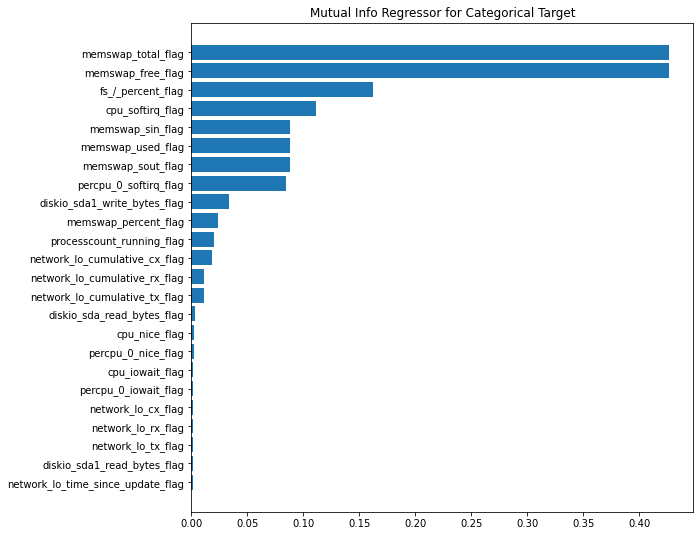

In [533]:
plt.figure(figsize = (9,9))
plot_mi_ca(mi_scores)

In [534]:
mi_scores = mi_scores[mi_scores>0.1]

In [535]:
X_c = X_c[list(mi_scores.index)]

In [536]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(X_c)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 13492.0


In [537]:
df['prediction2'] = fitClusters_huang

In [538]:
print(classification_report(df.flag, df.prediction2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80850
           1       1.00      1.00      1.00     14460

    accuracy                           1.00     95310
   macro avg       1.00      1.00      1.00     95310
weighted avg       1.00      1.00      1.00     95310



In [539]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_c.columns
vif['VIF'] = [variance_inflation_factor(X_c.values, i) for i in range(X_c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif  # But they do not have a high VIF score

/Users/haritchowdhury/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,memswap_total_flag,inf
1,memswap_free_flag,inf
2,fs_/_percent_flag,2.57
3,cpu_softirq_flag,2.07


In [540]:
# X_c.drop('memswap_free_flag', axis = 1, inplace = True)

# I did this step, 
# it may seem counterintuitive 
# but dropping this variables brings down the whole efficiency


# km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
# fitClusters_huang = km_huang.fit_predict(X_c)

#### Results can be predicted based on these two datasets independently

In [541]:
X

,fs_/_free,mem_cached,memswap_free
0,0.007027,0.000000,1.0
1,0.007021,0.000015,1.0
2,0.007018,0.000228,1.0
3,0.006994,0.000292,1.0
4,0.006989,0.000323,1.0
...,...,...,...
95305,0.972035,0.283153,0.0
95306,0.972035,0.283153,0.0
95307,0.972035,0.283153,0.0
95308,0.972035,0.283153,0.0


In [542]:
X_c

,memswap_total_flag,memswap_free_flag,fs_/_percent_flag,cpu_softirq_flag
0,1,1,1,0
1,1,1,1,0
2,1,1,1,0
3,1,1,1,0
4,1,1,1,0
...,...,...,...,...
95305,0,0,0,0
95306,0,0,0,1
95307,0,0,0,0
95308,0,0,0,0


In [545]:
print(accuracy_score(y, df['prediction1'])*100)
print(accuracy_score(y, df['prediction2'])*100)

100.0
100.0


In [555]:
variables = list(X_c.columns)+list(X.columns)

In [556]:
list_n = ['flag', 'an_flag', 'datetime']

In [557]:
for var in list_n:
    variables.append(var)

In [559]:
df_tf = df[variables]

#### Saving the Data

In [560]:
df.to_csv('analised.csv')
df_tf.to_csv('TimeseriesData')